In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10

/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

import torchvision
from torchvision import transforms

from networks.resnet import resnet16
from networks.resnet_2 import no_proj_resnet16

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#### Download Data

In [4]:
normalize = transforms.Normalize(mean=[x / 255 for x in [127.5, 127.5, 127.5]],
                                         std=[x / 255 for x in [127.5, 127.5, 127.5]])
transform_fn = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((32,32)),
            transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
            normalize,
            ])
fmnist = torchvision.datasets.FashionMNIST(root="/content/images/", download = True, train=True, transform = transform_fn)


Extracting /content/images/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/images/FashionMNIST/raw




Extracting /content/images/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/images/FashionMNIST/raw




Extracting /content/images/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/images/FashionMNIST/raw




Extracting /content/images/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/images/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Create mini batch

In [5]:
idx = []
idx1,idx2,idx3 = [],[],[]
for i in range(15000):
  if fmnist[i][1] == 0:
    idx1.append(i)
  if fmnist[i][1] == 1:
    idx2.append(i)
  if fmnist[i][1] == 2:
    idx3.append(i)

idx = idx1[:1000]+idx2[:1000]+idx3[:1000]
test_batch = torch.utils.data.DataLoader(fmnist, batch_size=128, sampler=idx)

#### Load checkpoints
static rampup

In [ ]:
static_worker1 = resnet16(local_module_num=2, batch_size=128)
sw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/rampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
static_worker2 = resnet16(local_module_num=2, batch_size=128)
sw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/rampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
static_worker3 = resnet16(local_module_num=2, batch_size=128)
sw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/rampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))
static_worker4 = resnet16(local_module_num=2, batch_size=128)
sw4c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/rampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60/checkpoint_3/model_best.pth.tar', map_location=torch.device('cpu'))

dynamic rampup

In [ ]:
dynamic_worker1 = resnet16(local_module_num=2, batch_size=128)
dw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60_run1/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
dynamic_worker2 = resnet16(local_module_num=2, batch_size=128)
dw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60_run1/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
dynamic_worker3 = resnet16(local_module_num=2, batch_size=128)
dw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60_run1/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))
dynamic_worker4 = resnet16(local_module_num=2, batch_size=128)
dw4c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.5_epochs_60_run1/checkpoint_3/model_best.pth.tar', map_location=torch.device('cpu'))

larger dynamic rampup

In [ ]:
larger_dynamic_worker1 = resnet16(local_module_num=2, batch_size=128)
ldw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
larger_dynamic_worker2 = resnet16(local_module_num=2, batch_size=128)
ldw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
larger_dynamic_worker3 = resnet16(local_module_num=2, batch_size=128)
ldw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))
larger_dynamic_worker4 = resnet16(local_module_num=2, batch_size=128)
ldw4c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_3/model_best.pth.tar', map_location=torch.device('cpu'))

larger larger dynamic rampup

In [6]:
xlarger_dynamic_worker1 = resnet16(local_module_num=2, batch_size=128)
xldw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
xlarger_dynamic_worker2 = resnet16(local_module_num=2, batch_size=128)
xldw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
xlarger_dynamic_worker3 = resnet16(local_module_num=2, batch_size=128)
xldw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))
xlarger_dynamic_worker4 = resnet16(local_module_num=2, batch_size=128)
xldw4c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/dynamicrampupdown/distance/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_1.0_b_100.0_skewness_rate_0.3333333333333333_epochs_90_run1/checkpoint_3/model_best.pth.tar', map_location=torch.device('cpu'))

no rampup

In [ ]:
no_worker1 = resnet16(local_module_num=2, batch_size=128)
nw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_100.0_b_1.0_skewness_rate_0.3333333333333333_epochs_60/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
no_worker2 = resnet16(local_module_num=2, batch_size=128)
nw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_100.0_b_1.0_skewness_rate_0.3333333333333333_epochs_60/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
no_worker3 = resnet16(local_module_num=2, batch_size=128)
nw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_100.0_b_1.0_skewness_rate_0.3333333333333333_epochs_60/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))
no_worker4 = resnet16(local_module_num=2, batch_size=128)
nw4c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/multiworker/worker_4/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_cos_lr__gamma_1_0.0_gamma_2_1.0_margin_1.0_a_100.0_b_1.0_skewness_rate_0.3333333333333333_epochs_60/checkpoint_3/model_best.pth.tar', map_location=torch.device('cpu'))

single projection head

In [ ]:
sph_worker1 = no_proj_resnet16(local_module_num=2, batch_size=128)
sphw1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/single_proj_head/multiworker/dynamicrampupdown/distance/worker_3/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_500.0_b_500.0_skewness_rate_0.5_epochs_130_run2/checkpoint_0/model_best.pth.tar', map_location=torch.device('cpu'))
sph_worker2 = no_proj_resnet16(local_module_num=2, batch_size=128)
sphw2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/single_proj_head/multiworker/dynamicrampupdown/distance/worker_3/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_500.0_b_500.0_skewness_rate_0.5_epochs_130_run2/checkpoint_1/model_best.pth.tar', map_location=torch.device('cpu'))
sph_worker3 = no_proj_resnet16(local_module_num=2, batch_size=128)
sphw3c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/single_proj_head/multiworker/dynamicrampupdown/distance/worker_3/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_500.0_b_500.0_skewness_rate_0.5_epochs_130_run2/checkpoint_2/model_best.pth.tar', map_location=torch.device('cpu'))

sph_projhead_1 = nn.Sequential(
      nn.Linear(in_features=8192, out_features=1024),
      nn.ReLU(),
      nn.Linear(in_features=1024, out_features=128)
    )

sphph1c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/single_proj_head/multiworker/dynamicrampupdown/distance/worker_3/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_500.0_b_500.0_skewness_rate_0.5_epochs_130_run2/checkpoint_ph_0/model_best.pth.tar', map_location=torch.device('cpu'))

sph_projhead_2 = nn.Sequential(
      nn.Linear(in_features=64, out_features=1024),
      nn.ReLU(),
      nn.Linear(in_features=1024, out_features=128)
    )
sphph2c = torch.load('/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10/InfoPro_fmnist_resnet16_K_2_/single_proj_head/multiworker/dynamicrampupdown/distance/worker_3/no_1_aux_net_config_1c2f_local_loss_mode_contrast_aux_net_widen_1.0_aux_net_feature_dim_128_alpha_1_5.0_beta_1_1.0_beta_2_1.0_ixx_2_0.0_ixy_2_0.0_gamma_1_0.0_gamma_2_1.0_margin_1.0_a_500.0_b_500.0_skewness_rate_0.5_epochs_130_run2/checkpoint_ph_1/model_best.pth.tar', map_location=torch.device('cpu'))

#### Load weights
dynamic rampup

In [ ]:
dynamic_worker1.load_state_dict(dw1c['state_dict'])
dynamic_worker2.load_state_dict(dw2c['state_dict'])
dynamic_worker3.load_state_dict(dw3c['state_dict'])
dynamic_worker4.load_state_dict(dw4c['state_dict'])

<All keys matched successfully>

static rampup

In [ ]:
new_state_dict = OrderedDict()
for k, v in sw1c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
static_worker1.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in sw2c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
static_worker2.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in sw3c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
static_worker3.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in sw4c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
static_worker4.load_state_dict(new_state_dict)

<All keys matched successfully>

no rampup

In [ ]:
new_state_dict = OrderedDict()
for k, v in nw1c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
no_worker1.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in nw2c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
no_worker2.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in nw3c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
no_worker3.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in nw4c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
no_worker4.load_state_dict(new_state_dict)

<All keys matched successfully>

larger dynamic rampup

In [ ]:
new_state_dict = OrderedDict()
for k, v in ldw1c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
larger_dynamic_worker1.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in ldw2c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
larger_dynamic_worker2.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in ldw3c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
larger_dynamic_worker3.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in ldw4c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
larger_dynamic_worker4.load_state_dict(new_state_dict)

<All keys matched successfully>

larger larger dynamic rampup

In [8]:
new_state_dict = OrderedDict()
for k, v in xldw1c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
xlarger_dynamic_worker1.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in xldw2c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
xlarger_dynamic_worker2.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in xldw3c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
xlarger_dynamic_worker3.load_state_dict(new_state_dict)
new_state_dict = OrderedDict()
for k, v in xldw4c['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
xlarger_dynamic_worker4.load_state_dict(new_state_dict)

<All keys matched successfully>

single projection head

In [ ]:
sph_worker1.load_state_dict(sphw1c['state_dict'])
sph_worker2.load_state_dict(sphw2c['state_dict'])
sph_worker3.load_state_dict(sphw3c['state_dict'])

sph_projhead_1.load_state_dict(sphph1c['state_dict'])
sph_projhead_2.load_state_dict(sphph2c['state_dict'])

<All keys matched successfully>

#### Pass through Model
static rampup

In [ ]:
sh1 = np.array([])
sh2 = np.array([])
sh3 = np.array([])
sh4 = np.array([])
for (img, target) in test_batch:
  _,_,_,_,sw1h2 = static_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,sw2h2 = static_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,sw3h2 = static_worker3(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,sw4h2 = static_worker4(img, target, 5,1,1,0,0,0,1)
  if sh1.size == 0:
    sh1 = sw1h2.detach().numpy()
    sh2 = sw2h2.detach().numpy()
    sh3 = sw3h2.detach().numpy()
    sh4 = sw4h2.detach().numpy()
    continue
  sh1 = np.append(sh1, sw1h2.detach().numpy(), axis=0)
  sh2 = np.append(sh2, sw2h2.detach().numpy(), axis=0)
  sh3 = np.append(sh3, sw3h2.detach().numpy(), axis=0)
  sh4 = np.append(sh4, sw4h2.detach().numpy(), axis=0)

dynamic rampup

In [ ]:
dh1 = np.array([])
dh2 = np.array([])
dh3 = np.array([])
dh4 = np.array([])
for (img, target) in test_batch:
  _,_,_,_,dw1h2 = dynamic_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,dw2h2 = dynamic_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,dw3h2 = dynamic_worker3(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,dw4h2 = dynamic_worker4(img, target, 5,1,1,0,0,0,1)
  if dh1.size == 0:
    dh1 = dw1h2.detach().numpy()
    dh2 = dw2h2.detach().numpy()
    dh3 = dw3h2.detach().numpy()
    dh4 = dw4h2.detach().numpy()
    continue
  dh1 = np.append(dh1, dw1h2.detach().numpy(), axis=0)
  dh2 = np.append(dh2, dw2h2.detach().numpy(), axis=0)
  dh3 = np.append(dh3, dw3h2.detach().numpy(), axis=0)
  dh4 = np.append(dh4, dw4h2.detach().numpy(), axis=0)

no rampup

In [ ]:
nh1 = np.array([])
nh2 = np.array([])
nh3 = np.array([])
nh4 = np.array([])
for (img, target) in test_batch:
  _,_,_,_,nw1h2 = dynamic_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,nw2h2 = dynamic_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,nw3h2 = dynamic_worker3(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,nw4h2 = dynamic_worker4(img, target, 5,1,1,0,0,0,1)
  if nh1.size == 0:
    nh1 = nw1h2.detach().numpy()
    nh2 = nw2h2.detach().numpy()
    nh3 = nw3h2.detach().numpy()
    nh4 = nw4h2.detach().numpy()
    continue
  nh1 = np.append(nh1, nw1h2.detach().numpy(), axis=0)
  nh2 = np.append(nh2, nw2h2.detach().numpy(), axis=0)
  nh3 = np.append(nh3, nw3h2.detach().numpy(), axis=0)
  nh4 = np.append(nh4, nw4h2.detach().numpy(), axis=0)

larger dynamic rampup

In [ ]:
ldh1 = np.array([])
ldh2 = np.array([])
ldh3 = np.array([])
ldh4 = np.array([])
for (img, target) in test_batch:
  _,_,_,_,ldw1h2 = larger_dynamic_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,ldw2h2 = larger_dynamic_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,ldw3h2 = larger_dynamic_worker3(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,ldw4h2 = larger_dynamic_worker4(img, target, 5,1,1,0,0,0,1)
  if ldh1.size == 0:
    ldh1 = ldw1h2.detach().numpy()
    ldh2 = ldw2h2.detach().numpy()
    ldh3 = ldw3h2.detach().numpy()
    ldh4 = ldw4h2.detach().numpy()
    continue
  ldh1 = np.append(ldh1, ldw1h2.detach().numpy(), axis=0)
  ldh2 = np.append(ldh2, ldw2h2.detach().numpy(), axis=0)
  ldh3 = np.append(ldh3, ldw3h2.detach().numpy(), axis=0)
  ldh4 = np.append(ldh4, ldw4h2.detach().numpy(), axis=0)

larger larger dynamic head

In [9]:
xldh1 = np.array([])
xldh2 = np.array([])
xldh3 = np.array([])
xldh4 = np.array([])
for (img, target) in test_batch:
  _,_,_,_,xldw1h2 = xlarger_dynamic_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,xldw2h2 = xlarger_dynamic_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,xldw3h2 = xlarger_dynamic_worker3(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,xldw4h2 = xlarger_dynamic_worker4(img, target, 5,1,1,0,0,0,1)
  if xldh1.size == 0:
    xldh1 = xldw1h2.detach().numpy()
    xldh2 = xldw2h2.detach().numpy()
    xldh3 = xldw3h2.detach().numpy()
    xldh4 = xldw4h2.detach().numpy()
    continue
  xldh1 = np.append(xldh1, xldw1h2.detach().numpy(), axis=0)
  xldh2 = np.append(xldh2, xldw2h2.detach().numpy(), axis=0)
  xldh3 = np.append(xldh3, xldw3h2.detach().numpy(), axis=0)
  xldh4 = np.append(xldh4, xldw4h2.detach().numpy(), axis=0)

single projection head

In [ ]:
sph_worker1.train()
sph_worker2.train()
sph_worker3.train()

sph_projhead_1.eval()
sph_projhead_2.eval()

sph_h1 = np.array([])
sph_h2 = np.array([])
sph_h3 = np.array([])

for (img, target) in test_batch:
  _,_,_,_,sphw1h2 = sph_worker1(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,sphw2h2 = sph_worker2(img, target, 5,1,1,0,0,0,1)
  _,_,_,_,sphw3h2 = sph_worker3(img, target, 5,1,1,0,0,0,1)
  
  sphw1h2 = sph_projhead_2(sphw1h2)
  sphw2h2 = sph_projhead_2(sphw2h2)
  sphw3h2 = sph_projhead_2(sphw3h2)

  if sph_h1.size == 0:
    sph_h1 = sphw1h2.detach().numpy()
    sph_h2 = sphw2h2.detach().numpy()
    sph_h3 = sphw3h2.detach().numpy()
    continue
  sph_h1 = np.append(sph_h1, sphw1h2.detach().numpy(), axis=0)
  sph_h2 = np.append(sph_h2, sphw2h2.detach().numpy(), axis=0)
  sph_h3 = np.append(sph_h3, sphw3h2.detach().numpy(), axis=0)

In [ ]:
sph_h1.shape

(3000, 128)

#### Combine outputs 

In [ ]:
sw_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
sw_pca = PCA(n_components=50)
dw_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
dw_pca = PCA(n_components=50)

sh_tuple=(sh1, sh2, sh3, sh4)
dh_tuple=(dh1, dh2, dh3, dh4)

sh = np.vstack(sh_tuple)
dh = np.vstack(dh_tuple)

In [ ]:
nw_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
nw_pca = PCA(n_components=50)

nh_tuple=(nh1, nh2, nh3, nh4)
nh = np.vstack(nh_tuple)

In [ ]:
ldw_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
ldw_pca = PCA(n_components=50)

ldh_tuple=(ldh1, ldh2, ldh3, ldh4)
ldh = np.vstack(ldh_tuple)

In [10]:
xldw_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
xldw_pca = PCA(n_components=50)

xldh_tuple=(xldh1, xldh2, xldh3, xldh4)
xldh = np.vstack(xldh_tuple)

In [ ]:
sph_tsne_fn = TSNE(n_components=2, verbose=1, perplexity=40.0, n_iter=300)
sph_pca = PCA(n_components=50)

sph_tuple=(sph_h1, sph_h2, sph_h3)
sph = np.vstack(sph_tuple)

#### Compute TSNE and PCA

dynamic and static rampup

In [ ]:
sw_pca_result = sw_pca.fit_transform(sh)
sw_tsne = sw_tsne_fn.fit_transform(sw_pca_result)
dw_pca_result = dw_pca.fit_transform(dh)
dw_tsne = dw_tsne_fn.fit_transform(dw_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.110s...
[t-SNE] Computed neighbors for 12000 samples in 2.930s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.373123
[t-SNE] KL divergenc

no rampup

In [ ]:
nw_pca_result = dw_pca.fit_transform(nh)
nw_tsne = nw_tsne_fn.fit_transform(nw_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.097s...
[t-SNE] Computed neighbors for 12000 samples in 2.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.124348
[t-SNE] KL divergenc

larger dynamic rampup

In [ ]:
ldw_pca_result = ldw_pca.fit_transform(ldh)
ldw_tsne = ldw_tsne_fn.fit_transform(ldw_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.130s...
[t-SNE] Computed neighbors for 12000 samples in 3.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.406542
[t-SNE] KL divergenc

larger larger dynamic rampup

In [11]:
xldw_pca_result = xldw_pca.fit_transform(xldh)
xldw_tsne = xldw_tsne_fn.fit_transform(xldw_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.135s...
[t-SNE] Computed neighbors for 12000 samples in 3.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.406503
[t-SNE] KL divergenc

single projection head

In [ ]:
sph_pca_result = sph_pca.fit_transform(sph)
sph_tsne = sph_tsne_fn.fit_transform(sph_pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.071s...
[t-SNE] Computed neighbors for 9000 samples in 8.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 0.403969
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.937660
[t-SNE] KL divergence after 300 iterations: 2.567154


### Plots

no rampup

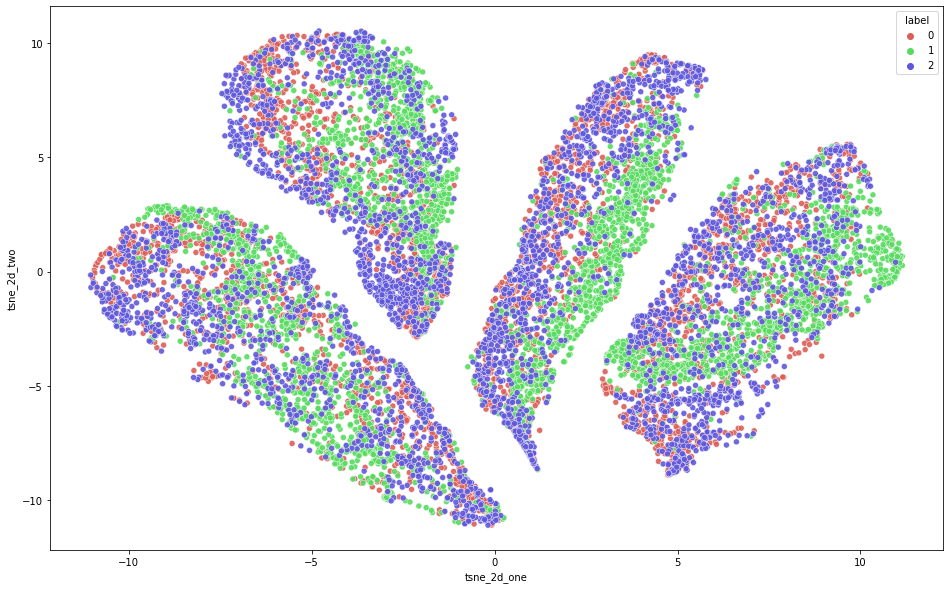

In [ ]:
nw_df=pd.DataFrame()
nw_df['tsne_2d_one'] = nw_tsne[:,0]
nw_df['tsne_2d_two'] = nw_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label + label
nw_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=nw_df,
    legend="full",
    alpha=0.9
)

static rampup

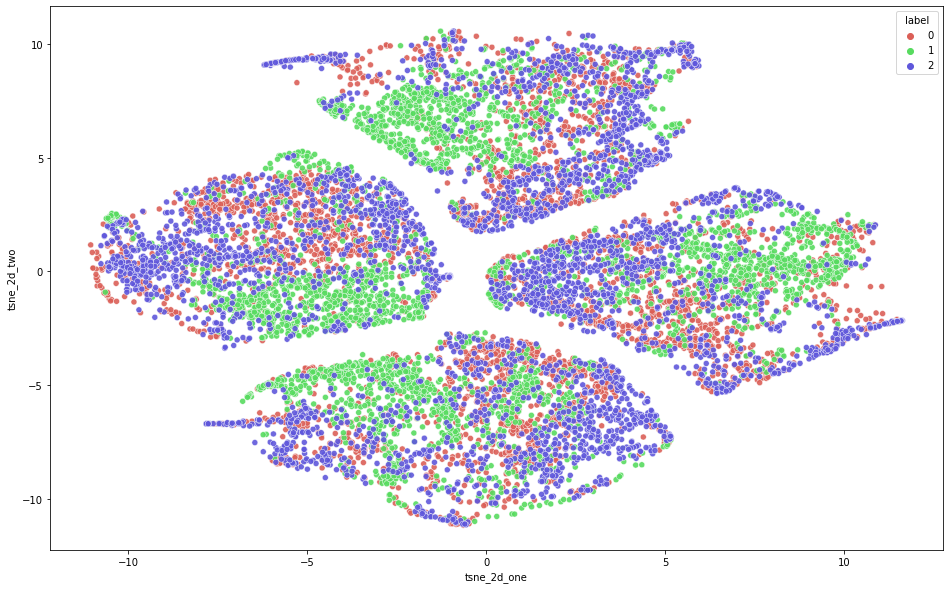

In [ ]:
sw_df=pd.DataFrame()
sw_df['tsne_2d_one'] = sw_tsne[:,0]
sw_df['tsne_2d_two'] = sw_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label + label
sw_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=sw_df,
    legend="full",
    alpha=0.9
)

dynamic rampup

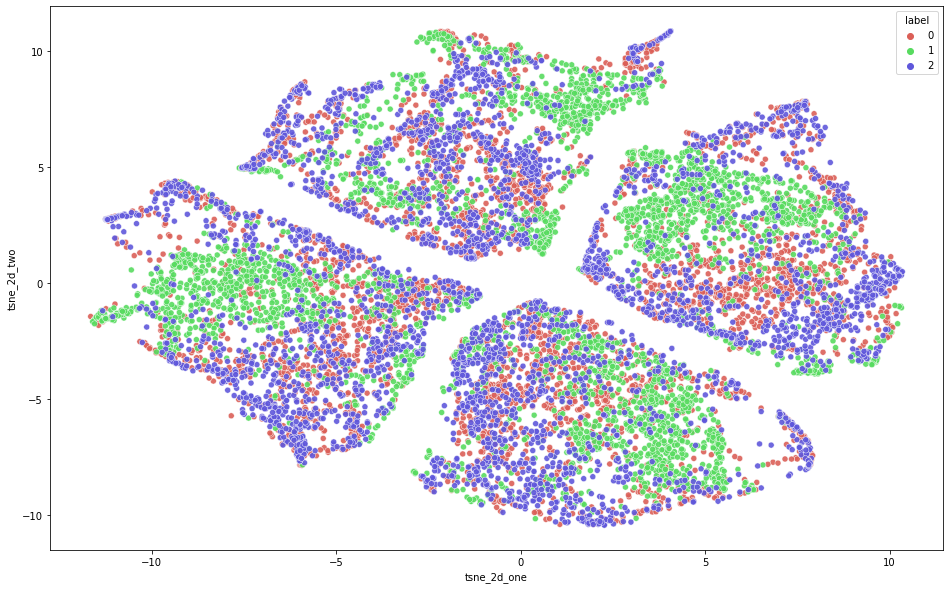

In [ ]:
dw_df=pd.DataFrame()
dw_df['tsne_2d_one'] = dw_tsne[:,0]
dw_df['tsne_2d_two'] = dw_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label + label
dw_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=dw_df,
    legend="full",
    alpha=0.9
)

larger dynamic rampup

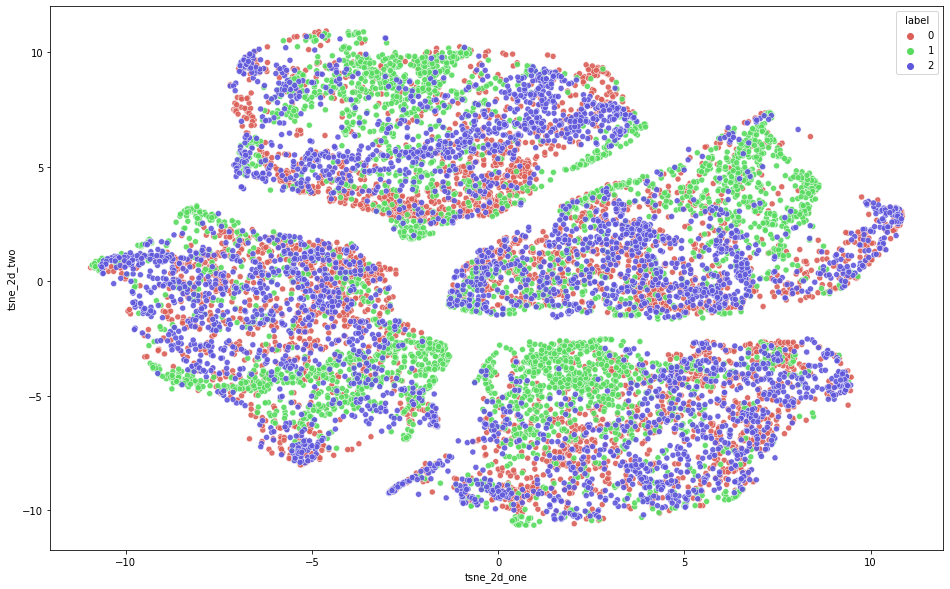

In [ ]:
ldw_df=pd.DataFrame()
ldw_df['tsne_2d_one'] = ldw_tsne[:,0]
ldw_df['tsne_2d_two'] = ldw_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label + label
ldw_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=ldw_df,
    legend="full",
    alpha=0.9
)

larger larger dynamic head

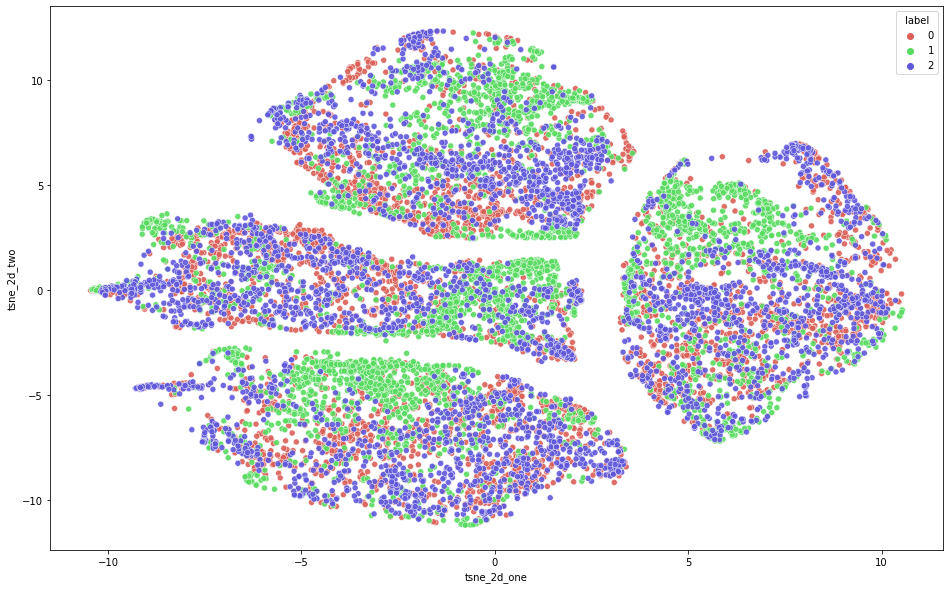

In [12]:
xldw_df=pd.DataFrame()
xldw_df['tsne_2d_one'] = xldw_tsne[:,0]
xldw_df['tsne_2d_two'] = xldw_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label + label
xldw_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=xldw_df,
    legend="full",
    alpha=0.9
)

single projection head

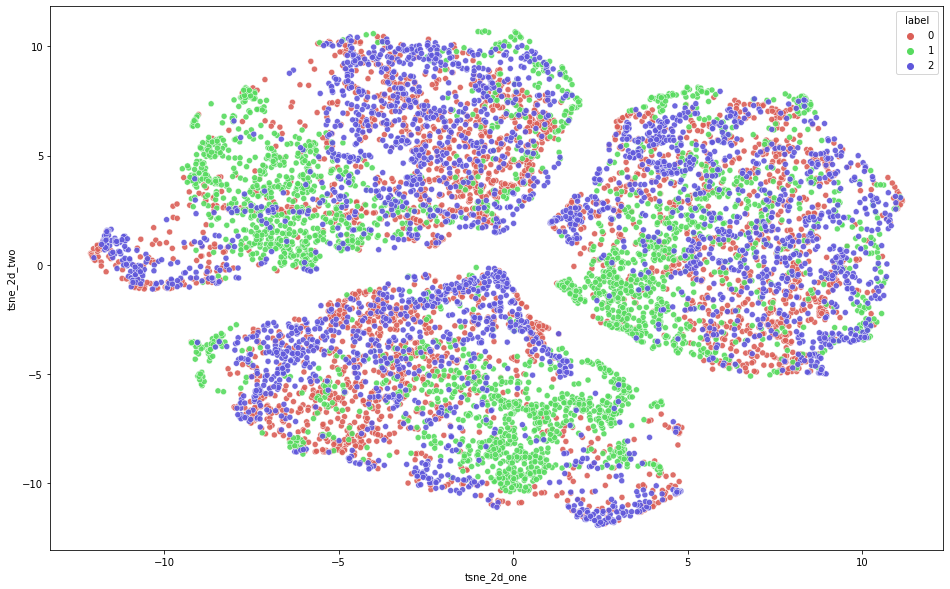

In [ ]:
sph_df=pd.DataFrame()
sph_df['tsne_2d_one'] = sph_tsne[:,0]
sph_df['tsne_2d_two'] = sph_tsne[:,1]

label = [0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)]
label = label + label + label
sph_df['label'] = label

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue='label',  
    palette=sns.color_palette("hls", 3),
    data=sph_df,
    legend="full",
    alpha=0.9
)